### Airbnb Classification

**Airbnb Business Model**

**Marketplace** that connect people who offers home with peope who wants to rent a home. 

Offert:
* Portfolio Density/Diversity
* Portfolio Size
* Average Price

Demand:
* LTV
* CAC
* Number of Users



**Business Problem**

New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

**Data Description**

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 




**Solution**
1. Predict and load in a database, use data visualization to see results

2. API: 
    * Input: id and customer features
    * Output: id + predict + probability

# 0.0. Load


## 0.1. Imports


In [44]:
import pandas as pd
import numpy as np

from sklearn import model_selection as ms
from sklearn import preprocessing as pp
from sklearn import metrics 

from keras import models as ml
from keras import layers as l

from scikitplot import metrics as mt

import random


## 0.2. Helper Functions

## 0.3. Load Dataset

In [14]:
df_raw = pd.read_csv('../data/train_users_2.csv', low_memory=True)
df_raw.shape

(213451, 16)

# 1.0. Data Description

In [15]:
df1 = df_raw.copy()

## 1.1. Data Types

In [16]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [17]:
df1.sample().T

,20773
id,umgjm33zwt
date_account_created,2012-04-08
timestamp_first_active,20120408063057
date_first_booking,NaN
gender,MALE
age,39.0
signup_method,facebook
signup_flow,0
language,en
affiliate_channel,sem-non-brand


In [18]:
df1.sample().T

,191238
id,zb48puhndn
date_account_created,2014-05-18
timestamp_first_active,20140518211656
date_first_booking,NaN
gender,MALE
age,28.0
signup_method,basic
signup_flow,0
language,en
affiliate_channel,direct


## 1.2. NA Check

In [19]:
df1.isna().sum()
df1 = df1.dropna()

## 1.3. Change Data Type

In [20]:
#date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])
#timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')
# date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])
#age
df1['age'] = df1['age'].astype('int64')

## 1.4. Check Balanced Data

In [21]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Data Filtering 

In [22]:
df2= df1.copy()

## 2.1. Filtering Rows

## 2.2. Columns Selections

# 3.0. Data Preparation

In [23]:
df3 = df2.copy()

In [24]:
#dummy variable
df3_dummy = pd.get_dummies(df3.drop(['id','country_destination'], axis=1))

#join id and country destination
df3 = pd.concat([df3[['id', 'country_destination']], df3_dummy], axis=1)

# 4.0. Feature Selections

In [25]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] #original dates
df4 = df3.drop(cols_drop, axis=1)

In [26]:
X = df4.drop('country_destination', axis=1)
y = df4['country_destination'].copy()

# 5.0. Machine Learning Model

In [67]:
weights = df1['country_destination'].value_counts(normalize=True).sort_index().tolist()

## 5.1. Baseline Model

In [68]:
import random

country_destination_list = df4['country_destination'].drop_duplicates().sort_values().tolist()
k_num = y_test.shape[0]
yhat_random = random.choices(population=country_destination_list, k=k_num, weights=weights)

## 5.2. Neural Network - MLP

In [69]:
#split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=32)

In [28]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)



In [29]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1,1)).toarray()

In [30]:
#model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=x_train.shape[1] , activation='relu'))
model.add(l.Dense(11, activation='softmax'))

#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#train model
model.fit(x_train, y_train_nn, epochs=100)

2022-04-26 06:29:06.844623: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-26 06:29:06.844666: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-26 06:29:06.844697: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (heitor-Lenovo-ideapad-330-15IKB): /proc/driver/nvidia/version does not exist
2022-04-26 06:29:06.845070: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.3373 - accuracy: 0.7015
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2401 - accuracy: 0.7084
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2117 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1957 - accuracy: 0.7085
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1792 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1686 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1545 - accuracy: 0.7088
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1483 - accuracy: 0.7086
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1448 - accuracy: 0.7087
Epoch 10/100
1705/1705 [==============================] - 2s 1ms/step - l

1705/1705 [==============================] - 2s 1ms/step - loss: 1.1030 - accuracy: 0.7111
Epoch 80/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1034 - accuracy: 0.7113
Epoch 81/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1022 - accuracy: 0.7114
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1028 - accuracy: 0.7114
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1022 - accuracy: 0.7113
Epoch 84/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1023 - accuracy: 0.7114
Epoch 85/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1015 - accuracy: 0.7117
Epoch 86/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1017 - accuracy: 0.7115
Epoch 87/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1016 - accuracy: 0.7115
Epoch 88/100
1705/1705 [==============================] - 2s 1ms/step - loss:

# 6.0. Performance

## 6.1. Baseline Performance

Accuracy score: 0.5188852218555189
Balanced accuracy score: 0.09085139586899221
Kappa score: -0.001912206263423144


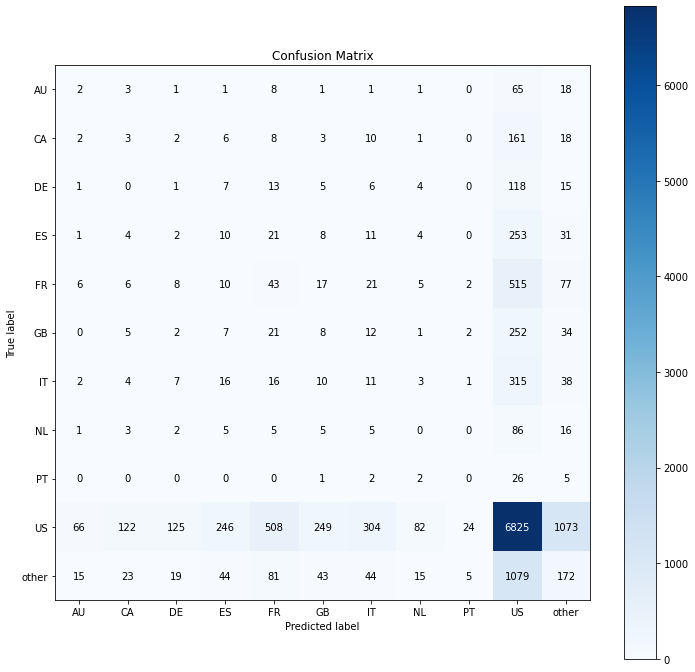

In [70]:
#Accuracy
acc_random = metrics.accuracy_score(y_test_nn, yhat_random)
print(f'Accuracy score: {acc_random}')


#Balanced accurace
balanced_acc_random = metrics.balanced_accuracy_score(y_test_nn, yhat_random)
print(f'Balanced accuracy score: {balanced_acc_random}')

#Kappa
kappa_random = metrics.cohen_kappa_score(y_test_nn, yhat_random)
print(f'Kappa score: {kappa_random}')

#Confusion Matrix
mt.plot_confusion_matrix(y_test_nn, yhat_random, normalize=False, figsize=(12,12));

## 6.2. NN Performance

In [31]:
#prediction
pred_nn = model.predict(x_test)

#invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

#prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1,-1)[0]

In [32]:
yhat_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

Accuracy score: 0.7030436376971031
Balanced accuracy score: 0.09095395201057062
Kappa score: -0.00020392464723406611


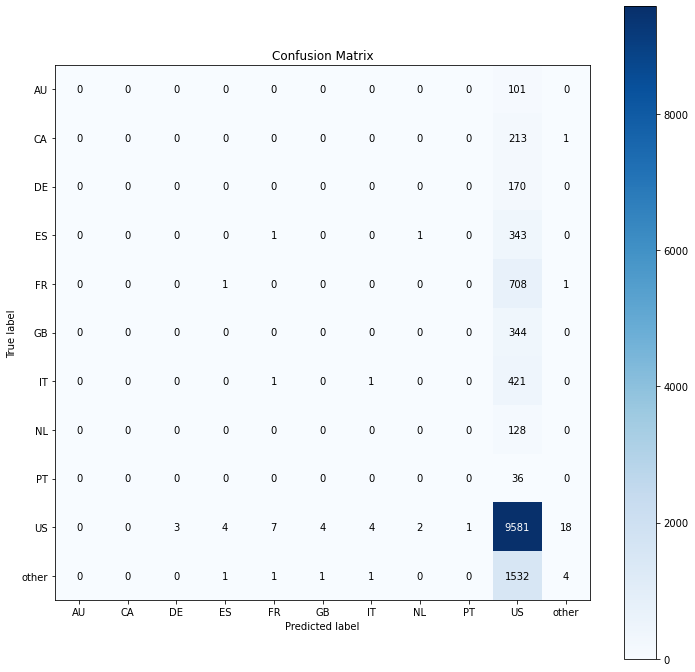

In [40]:
#Accuracy
acc_nn = metrics.accuracy_score(y_test_nn, yhat_nn)
print(f'Accuracy score: {acc_nn}')


#Balanced accurace
balanced_acc_nn = metrics.balanced_accuracy_score(y_test_nn, yhat_nn)
print(f'Balanced accuracy score: {balanced_acc_nn}')

#Kappa
kappa_nn = metrics.cohen_kappa_score(y_test_nn, yhat_nn)
print(f'Kappa score: {kappa_nn}')

#Confusion Matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12,12));



In [42]:
print(metrics.classification_report(y_test_nn, yhat_nn))

/home/heitor/repos/airbnb_booking_classification/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/heitor/repos/airbnb_booking_classification/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       0.00      0.00      0.00       170
          ES       0.00      0.00      0.00       345
          FR       0.00      0.00      0.00       710
          GB       0.00      0.00      0.00       344
          IT       0.17      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      1.00      0.83      9624
       other       0.17      0.00      0.01      1540

    accuracy                           0.70     13635
   macro avg       0.09      0.09      0.08     13635
weighted avg       0.52      0.70      0.58     13635



/home/heitor/repos/airbnb_booking_classification/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
balanced_acc_list = []
kappa_list = []

#stratified kfold
num_folds=5
kfold = ms.StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

i= 1
for train_ix, val_ix in kfold.split(x_train, y_train):
    print('Fold number {}'.format(i))
    #get fold
    x_train_fold = x_train.iloc[train_ix]
    y_train_fold = y_train.iloc[train_ix]
    
    x_val_fold = x_train.iloc[val_ix]
    y_val_fold = y_train.iloc[val_ix]
    
    #one hot enconding
    
    ohe = pp.OneHotEncoder()
    y_train_fold_nn = ohe.fit_transform(y_train_fold.values.reshape(-1,1)).toarray()
    
    
    #model definition
    model = ml.Sequential()
    model.add(l.Dense(256, input_dim=x_train.shape[1],activation='relu'))
    model.add(l.Dense(11, activation='softmax'))


    #model train
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train_fold, y_train_fold_nn, epochs=100, batch_size=32, verbose=True)
    
    #model predict

    pred_nn = model.predict(x_val_fold)
    yhat_nn = ohe.inverse_transform(pred_nn)
              
              
    #prepare data    
    y_test_nn = y_val_fold.to_numpy()
    yhat_nn = yhat_nn.reshape(1,-1)[0]
              
              
    #metrics

    #balanced accuracy
    balanced_acc_nn = metrics.balanced_accuracy_score(y_test_nn, yhat_nn)
    balanced_acc_list.append(balanced_acc_nn)
    #kappa
              
    kappa_acc_nn = metrics.cohen_kappa_score(y_test_nn, yhat_nn)
    kappa_list.append(kappa_acc_nn)
    i+=1

Fold number 1
Epoch 1/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.3884 - accuracy: 0.7025
Epoch 2/100
1364/1364 [==============================] - 2s 2ms/step - loss: 1.3106 - accuracy: 0.7059
Epoch 3/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.2609 - accuracy: 0.7077
Epoch 4/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.2325 - accuracy: 0.7083
Epoch 5/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1966 - accuracy: 0.7085
Epoch 6/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1662 - accuracy: 0.7088
Epoch 7/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1532 - accuracy: 0.7087
Epoch 8/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1447 - accuracy: 0.7087
Epoch 9/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1360 - accuracy: 0.7092
Epoch 10/100
1364/1364 [==============================] - 2

1364/1364 [==============================] - 2s 1ms/step - loss: 1.0741 - accuracy: 0.7149
Epoch 80/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0740 - accuracy: 0.7148
Epoch 81/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0733 - accuracy: 0.7149
Epoch 82/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0718 - accuracy: 0.7149
Epoch 83/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0725 - accuracy: 0.7149
Epoch 84/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0727 - accuracy: 0.7149
Epoch 85/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0720 - accuracy: 0.7146
Epoch 86/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0719 - accuracy: 0.7152
Epoch 87/100
1364/1364 [==============================] - 2s 2ms/step - loss: 1.0703 - accuracy: 0.7152
Epoch 88/100
1364/1364 [==============================] - 2s 1ms/step - loss:

1364/1364 [==============================] - 2s 1ms/step - loss: 1.0868 - accuracy: 0.7125
Epoch 58/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0850 - accuracy: 0.7128
Epoch 59/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0853 - accuracy: 0.7128
Epoch 60/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0848 - accuracy: 0.7126
Epoch 61/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0840 - accuracy: 0.7128
Epoch 62/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0830 - accuracy: 0.7132
Epoch 63/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0830 - accuracy: 0.7131
Epoch 64/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0819 - accuracy: 0.7133
Epoch 65/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0812 - accuracy: 0.7134
Epoch 66/100
1364/1364 [==============================] - 2s 1ms/step - loss:

1364/1364 [==============================] - 2s 1ms/step - loss: 1.1048 - accuracy: 0.7107
Epoch 36/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1034 - accuracy: 0.7113
Epoch 37/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1026 - accuracy: 0.7114
Epoch 38/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1016 - accuracy: 0.7110
Epoch 39/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1004 - accuracy: 0.7115
Epoch 40/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0990 - accuracy: 0.7119
Epoch 41/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0980 - accuracy: 0.7113
Epoch 42/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0968 - accuracy: 0.7114
Epoch 43/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0974 - accuracy: 0.7119
Epoch 44/100
1364/1364 [==============================] - 2s 1ms/step - loss:

1364/1364 [==============================] - 2s 1ms/step - loss: 1.1295 - accuracy: 0.7095
Epoch 14/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1279 - accuracy: 0.7095
Epoch 15/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1270 - accuracy: 0.7095
Epoch 16/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1260 - accuracy: 0.7096
Epoch 17/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1250 - accuracy: 0.7097
Epoch 18/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1236 - accuracy: 0.7097
Epoch 19/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1235 - accuracy: 0.7096
Epoch 20/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1208 - accuracy: 0.7098
Epoch 21/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.1193 - accuracy: 0.7098
Epoch 22/100
1364/1364 [==============================] - 2s 1ms/step - loss:

1364/1364 [==============================] - 2s 1ms/step - loss: 1.0737 - accuracy: 0.7153
Epoch 92/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0740 - accuracy: 0.7147
Epoch 93/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0741 - accuracy: 0.7149
Epoch 94/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0728 - accuracy: 0.7153
Epoch 95/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0736 - accuracy: 0.7151
Epoch 96/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0731 - accuracy: 0.7148
Epoch 97/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0733 - accuracy: 0.7151
Epoch 98/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0718 - accuracy: 0.7151
Epoch 99/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0719 - accuracy: 0.7151
Epoch 100/100
1364/1364 [==============================] - 2s 1ms/step - loss

1364/1364 [==============================] - 2s 1ms/step - loss: 1.0802 - accuracy: 0.7138
Epoch 70/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0789 - accuracy: 0.7137
Epoch 71/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0783 - accuracy: 0.7140
Epoch 72/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0777 - accuracy: 0.7139
Epoch 73/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0780 - accuracy: 0.7143
Epoch 74/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0763 - accuracy: 0.7143
Epoch 75/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0756 - accuracy: 0.7147
Epoch 76/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0769 - accuracy: 0.7142
Epoch 77/100
1364/1364 [==============================] - 2s 1ms/step - loss: 1.0758 - accuracy: 0.7141
Epoch 78/100
1364/1364 [==============================] - 2s 1ms/step - loss:

In [87]:
print(f'Balanced Accuracy CV = {np.mean(balanced_acc_list)}')
print(f'Kappa Score CV = {np.mean(kappa_list)}')

Balanced Accuracy CV = 0.09128747313761948
Kappa Score CV = 0.0031439680746664146


SyntaxError: invalid syntax (1463043433.py, line 1)